In [7]:
# === 1. Preparar entorno y datos ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset no lineal
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Dividir y escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

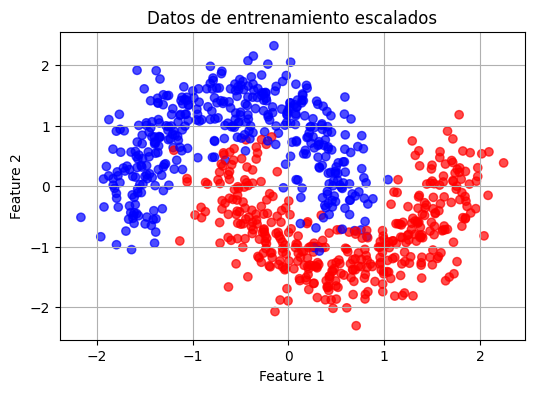

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.title("Datos de entrenamiento escalados")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [8]:
# === 2. Entrenamiento estándar ===
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo MLP
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar y guardar historia
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


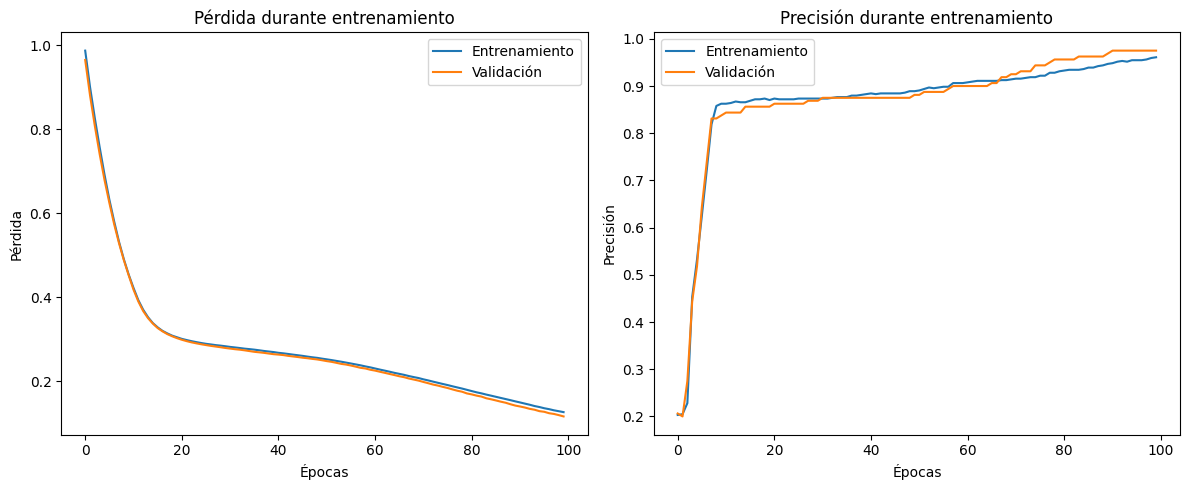

In [9]:
# === 3. Gráficos de desempeño ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Entrenamiento")
plt.plot(history.history['val_loss'], label="Validación")
plt.title("Pérdida durante entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Entrenamiento")
plt.plot(history.history['val_accuracy'], label="Validación")
plt.title("Precisión durante entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.tight_layout()
plt.show()

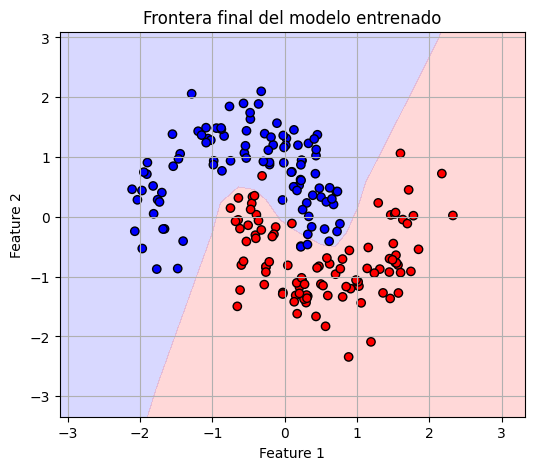

In [11]:
# === 4. Frontera de decisión final ===
def plot_decision_boundary(model, X, y, title="Frontera de decisión"):
    h = 0.01
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid, verbose=0).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X_test_scaled, y_test, title="Frontera final del modelo entrenado")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9844 - loss: 0.0992  
Precisión en test: 0.98
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


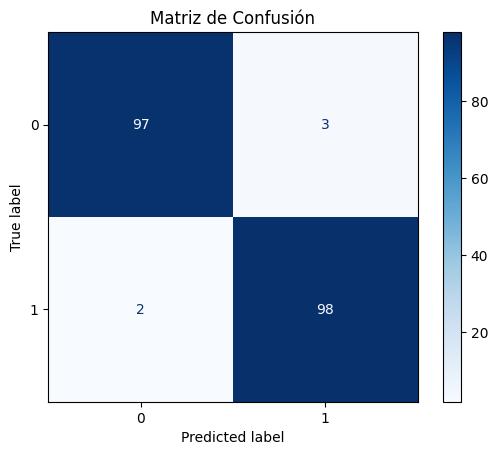

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [12]:
# Evaluar en test
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Precisión en test: {test_accuracy:.2f}")

# Matriz de confusión
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Reporte
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

In [13]:
# === 5. Animación del entrenamiento (MLP nuevo) ===
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Modelo nuevo para animación
anim_model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])
anim_model.compile(optimizer='adam', loss='binary_crossentropy')

# Grid
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Crear figura
fig, ax = plt.subplots()

def init():
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Inicio del entrenamiento")
    return ax,

def update(epoch):
    anim_model.fit(X_train_scaled, y_train, epochs=1, verbose=0)

    Z = anim_model.predict(grid, verbose=0).reshape(xx.shape)
    ax.clear()
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.3)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap="bwr", edgecolor='k')
    ax.set_title(f"Frontera de decisión - Época {epoch+1}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    return ax,

# Generar animación (50 frames)
anim = FuncAnimation(fig, update, frames=50, init_func=init, blit=False)
plt.close()

# Mostrar animación
HTML(anim.to_jshtml())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
